In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import copy
import result_utils
import os

In [2]:
def get_Results(path):
    Res = result_utils.RetrievalResults(path)

    Res._load_initial_components()
    Res._load_evaluation_components()
    Res.elapsed_times = []

    if 'cloud_fraction' in list(Res.ParamTable.table.name):
        key = 'log_X_base_Mg2SiO4(s)_amorphous__Mie'
        idx = Res.ParamTable.get(key, key='idx_free')
        log_X_base_Mg2SiO4 = Res.bestfit_parameters[idx]
        Res.bestfit_parameters[idx] = -np.inf
        Res._evaluate_sample(Res.bestfit_parameters, evaluation=True)
        
        optical_depths_clear = {}; contr_per_wave_clear = {}; integrated_contr_clear = {}
        for m_set in Res.m_spec.keys():
            optical_depths_clear[m_set]   = copy.deepcopy(Res.m_spec[m_set].optical_depths)
            contr_per_wave_clear[m_set]   = copy.deepcopy(Res.m_spec[m_set].contr_per_wave)
            integrated_contr_clear[m_set] = copy.deepcopy(Res.m_spec[m_set].integrated_contr)

        Res.optical_depths_clear   = optical_depths_clear
        Res.contr_per_wave_clear   = contr_per_wave_clear
        Res.integrated_contr_clear = integrated_contr_clear

        Res.bestfit_parameters[idx] = log_X_base_Mg2SiO4

    Res._evaluate_sample(Res.bestfit_parameters, evaluation=True)

    optical_depths_cloudy = {}; contr_per_wave_cloudy = {}; integrated_contr_cloudy = {}
    for m_set in Res.m_spec.keys():
        optical_depths_cloudy[m_set]   = copy.deepcopy(Res.m_spec[m_set].optical_depths)
        contr_per_wave_cloudy[m_set]   = copy.deepcopy(Res.m_spec[m_set].contr_per_wave)
        integrated_contr_cloudy[m_set] = copy.deepcopy(Res.m_spec[m_set].integrated_contr)

    Res.optical_depths_cloudy   = optical_depths_cloudy
    Res.contr_per_wave_cloudy   = contr_per_wave_cloudy
    Res.integrated_contr_cloudy = integrated_contr_cloudy

    return Res

path = '/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/{}/test_'
Res_all = get_Results(path.format('all_gratings_freechem_ret_3'))

Res_g140h = get_Results(path.format('g140h_nrs12_freechem_ret_1'))
Res_g235h = get_Results(path.format('g235h_nrs12_freechem_ret_10'))
Res_g395h = get_Results(path.format('g395h_nrs12_freechem_ret_5'))

/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/all_gratings_freechem_ret_3/test_data
  analysing data from /net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/all_gratings_freechem_ret_3/test_.txt
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g140h_nrs12_freechem_ret_1/test_data
  analysing data from /net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g140h_nrs12_freechem_ret_1/test_.txt
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g235h_nrs12_freechem_ret_10/test_data
  analysing data from /net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g235h_nrs12_freechem_ret_10/test_.txt
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g395h_nrs12_freechem_ret_5/test_data
  analysing data from /net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/g395h_nrs12_freechem_ret_5/test_.txt


In [147]:
Res_1c = get_Results(path.format('all_gratings_freechem_ret_3_1column'))

/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/all_gratings_freechem_ret_3_1column/test_data
  analysing data from /net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/retrieval_outputs/all_gratings_freechem_ret_3_1column/test_.txt
Loading Radtrans opacities...
 Loading line opacities of species '1H2-16O__POKAZATEL' from file '/net/lem/data2/pRT3_formatted/input_data/opacities/lines/line_by_line/H2O/1H2-16O/1H2-16O__POKAZATEL.R1e+06_0.3-28.0mu.xsec.petitRADTRANS.h5'... Done.
 Loading line opacities of species '1H2-18O__HotWat78' from file '/net/lem/data2/pRT3_formatted/input_data/opacities/lines/line_by_line/H2O/1H2-18O/1H2-18O__HotWat78.R1e+06_0.3-28.0mu.xsec.petitRADTRANS.h5'... Done.
 Loading line opacities of species '1H2-17O__HotWat78' from file '/net/lem/data2/pRT3_formatted/input_data/opacities/lines/line_by_line/H2O/1H2-17O/1H2-17O__HotWat78.R1e+06_0.3-28.0mu.xsec.petitRADTRANS.h5'... Done.
 Loading line opacities of species '12C-1H4__MM' from file '/net/lem/d

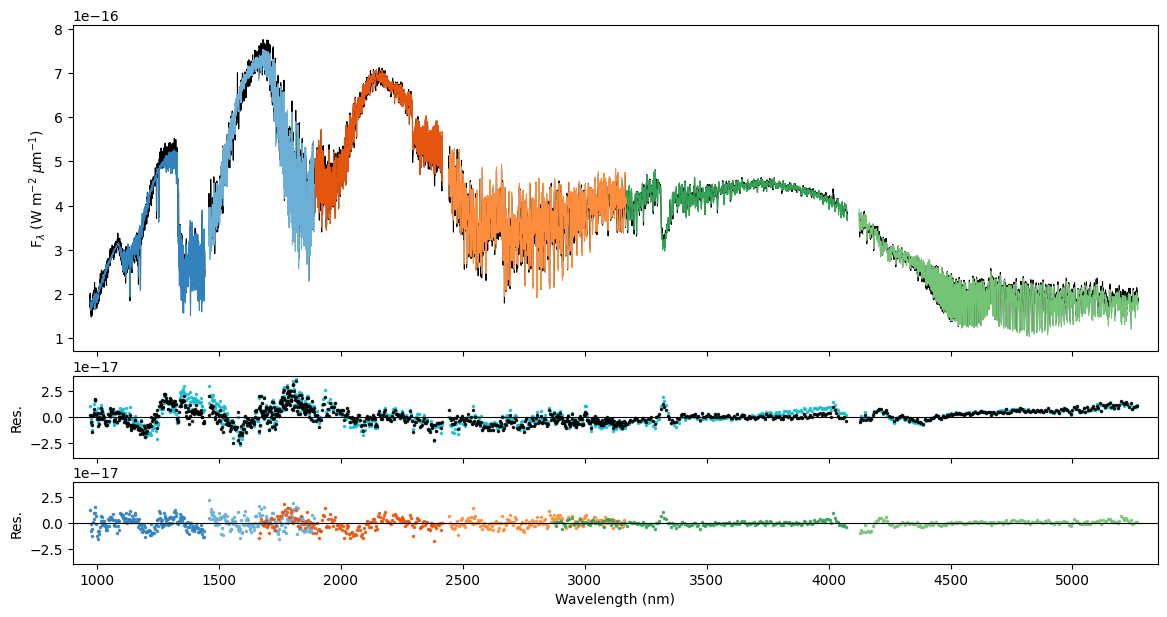

In [191]:
def bin_residuals(wave, res_flux, bin_size):
    n_bins = int(len(wave)/bin_size)
    wave_binned = np.zeros(n_bins)
    res_flux_binned = np.zeros(n_bins)
    for i in range(n_bins):
        wave_binned[i] = np.mean(wave[i*bin_size:(i+1)*bin_size])
        res_flux_binned[i] = np.mean(res_flux[i*bin_size:(i+1)*bin_size])
    return wave_binned, res_flux_binned

c_d = 'k'; lw_d = 0.8
c_m = 'C1'; lw_m = 0.8
res_alpha = 0.85

cmap = plt.get_cmap('tab20c')
colors = {
    'nirspec_g140h_1': cmap(0/20),
    'nirspec_g140h_2': cmap(1/20),
    'nirspec_g235h_1': cmap(4/20),
    'nirspec_g235h_2': cmap(5/20),
    'nirspec_g395h_1': cmap(8/20),
    'nirspec_g395h_2': cmap(9/20),
}

fig = plt.figure(figsize=(14,7))
gs = fig.add_gridspec(nrows=3, ncols=1, hspace=0.15, wspace=0, height_ratios=[0.8,0.2,0.2])
ax = fig.add_subplot(gs[0,0]); ax_res = fig.add_subplot(gs[1,0]); ax_res2 = fig.add_subplot(gs[2,0])

xlim = (900,5350)

for i, m_set in enumerate(Res_all.d_spec.keys()):
    d_wave = Res_all.d_spec[m_set].wave.flatten()
    d_flux = Res_all.d_spec[m_set].flux.flatten()

    m_flux = Res_all.LogLike.m_flux_phi[m_set][0]
    m_flux_A = Res_all.m_spec_broad[m_set].flux_binned.flatten()

    ax.plot(d_wave, d_flux, c=c_d, lw=lw_d)
    ax.plot(d_wave, m_flux, c=colors[m_set], lw=lw_m)

    res_flux = d_flux - m_flux
    
    wave_binned, res_flux_binned = bin_residuals(d_wave, res_flux, bin_size=10)
    # ax_res.plot(wave_binned, res_flux_binned, c=colors[m_set], marker='.', ls='', alpha=res_alpha, markersize=3)
    ax_res.plot(wave_binned, res_flux_binned, c='k', marker='.', ls='', alpha=res_alpha, markersize=3)

    m_flux = Res_1c.LogLike.m_flux_phi[m_set][0]
    res_flux = d_flux - m_flux
    wave_binned, res_flux_binned = bin_residuals(d_wave, res_flux, bin_size=10)
    ax_res.plot(wave_binned, res_flux_binned, c='C9', marker='.', ls='', alpha=res_alpha, markersize=3, zorder=-1)

ax_res.axhline(0, c='k', lw=lw_m)
ylim = ax_res.get_ylim()
ylim = (-np.max(np.abs(ylim)), np.max(np.abs(ylim)))

ax.set(ylabel=r'F$_\lambda$ (W m$^{-2}$ $\mu$m$^{-1}$)', xticklabels=[], xlim=xlim)
ax_res.set(ylabel='Res.', ylim=ylim, xticklabels=[], xlim=xlim)
# ax_res.annotate('All Gratings', xy=(0.98,0.05), xycoords='axes fraction', ha='right', va='bottom', fontsize=12)

for Res_i in [Res_g140h, Res_g235h, Res_g395h]:
    for m_set in Res_i.d_spec.keys():
        d_wave = Res_i.d_spec[m_set].wave.flatten()
        d_flux = Res_i.d_spec[m_set].flux.flatten()

        m_flux = Res_i.LogLike.m_flux_phi[m_set][0]
        m_flux_A = Res_i.m_spec_broad[m_set].flux_binned.flatten()

        res_flux = d_flux - m_flux

        # ax.plot(d_wave, m_flux, c=colors[m_set], lw=lw_m)
        
        wave_binned, res_flux_binned = bin_residuals(d_wave, res_flux, bin_size=10)
        ax_res2.plot(wave_binned, res_flux_binned, c=colors[m_set], marker='.', ls='', alpha=res_alpha, markersize=3)
        # ax_res.plot(wave_binned, res_flux_binned, c=colors[m_set], marker='.', ls='', alpha=res_alpha, markersize=3)

ax_res2.axhline(0, c='k', lw=lw_m)
# ylim = ax_res2.get_ylim()
# ylim = (-np.max(np.abs(ylim)), np.max(np.abs(ylim)))

ax_res2.set(xlabel='Wavelength (nm)', ylabel='Res.', ylim=ylim, xlim=xlim)
# ax_res2.annotate('Per Grating', xy=(0.98,0.05), xycoords='axes fraction', ha='right', va='bottom', fontsize=12)

plt.savefig('/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/figures/residuals_all_vs_per_grating.png', dpi=300, bbox_inches='tight')
plt.show()

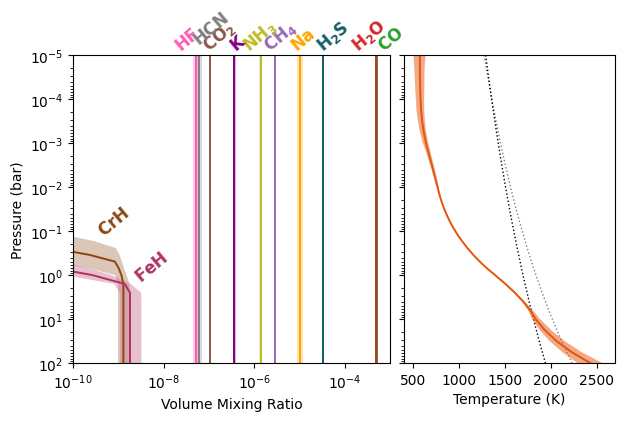

In [138]:
def plot_condensation_curve(ax, pressure, species, FeH=0.0, ann_kwargs=None, **kwargs):

    coeffs = {
        'CaTiO3': [5.125, -0.277, -0.554], # Wakeford et al. (2017)
        'Fe': [5.44, -0.48, -0.48], # Visscher et al. (2010)
        'Mg2SiO4': [5.89, -0.37, -0.73], # Visscher et al. (2010)
        'MgSiO3': [6.26, -0.35, -0.70], # Visscher et al. (2010)
        'Cr': [6.576, -0.486, -0.486], # Morley et al. (2012)
        'KCl': [12.479, -0.879, -0.879], # Morley et al. (2012)
        'MnS': [7.45, -0.42, -0.84], # Visscher et al. (2006)
        'Na2S': [10.05, -0.72, -1.08], # Visscher et al. (2006)
        'ZnS': [12.52, -0.63, -1.26], # Visscher et al. (2006)
        'H2S': [86.49, -8.54, -8.54], # Visscher et al. (2006)
    }

    a, b, c = coeffs[species]
    y = a + b*np.log10(pressure) + c*FeH
    T = 1e4/y
    
    ax.plot(T, pressure, **kwargs, zorder=-2)

    if ann_kwargs is None:
        return
    
    y = ann_kwargs.get('y', 1e0)
    ann_kwargs['xy'] = (np.interp(np.log10(y),np.log10(pressure),T), y)
    ann_kwargs.pop('y')

    ax.annotate(**ann_kwargs, zorder=-1)
    
def plot_envelopes(ax, y, x, x_indices=[[2,4]], fc=[], median_kwargs={}, **fill_betweenx_kwargs):
    
    patch = None
    for i, (idx_l, idx_u) in enumerate(x_indices):
        patch = ax.fill_betweenx(
            y=y, x1=x[idx_l], x2=x[idx_u], fc=fc[i], **fill_betweenx_kwargs
            )
    
    line = None
    if len(median_kwargs) > 0:
        idx_m = median_kwargs.get('idx', 3)
        median_kwargs.pop('idx', None)

        line, = ax.plot(x[idx_m], y, **median_kwargs)
    
    return (line, patch, line)

def plot_VMR_envelope(ax, Chem, species, log_g_norm_factor=None, median_kwargs={}, **fill_betweenx_kwargs):

    if log_g_norm_factor is not None:
        VMR_q = result_utils.profile_quantiles(Chem.VMRs_posterior[species]*log_g_norm_factor)
    else:
        VMR_q = result_utils.profile_quantiles(Chem.VMRs_posterior[species])
    plot_envelopes(
        ax, Chem.pressure, VMR_q, median_kwargs=median_kwargs, **fill_betweenx_kwargs, 
        )
    
fig, (ax_VMR, ax_PT) = plt.subplots(figsize=(7,4), ncols=2, sharey=True, gridspec_kw={'width_ratios':[0.6,0.4], 'wspace':0.05})
                  
m_set = 'nirspec_g140h_1'
species_info = {
    '12CO': ('C2', 'CO', (+0.3,0)), 
    'H2O': ('C3', 'H_2O', (-0.15,0)),
    'CO2': ('C5', 'CO_2', (+0.2,0)),
    'CH4': ('C4', 'CH_4', (+0.1,0)),

    'NH3': ('C8', 'NH_3', (0,0)),
    'HCN': ('C7', 'HCN', (+0.35,+0.02)),

    'H2S': ('#135D64', 'H_2S', (+0.2,0)),
    'HF': ('#FF59B4', 'HF', (-0.2,0)),

    'CrH': ('#8B4513', 'CrH', (0,-0.6)),
    'FeH': ('#B03060', 'FeH', (0,-0.75)),

    'Na': ('#FFA500', 'Na', (+0.1,0)),
    'K': ('#800080', 'K', (+0.1,0)),
}
for species, (c, l, xy) in species_info.items():
    l = r'$\mathrm{\bf '+f'{l}'+'}$'
    fc = mpl.colors.LinearSegmentedColormap.from_list('', ['w',c])([0.6,0.8,1.0])

    plot_VMR_envelope(
        ax_VMR, Res_all.Chem[m_set], species, median_kwargs=dict(c=c, lw=1.4, ls='-'), **dict(fc=fc, ec='none', alpha=0.5)
        )
    
    x = 10**(np.log10(Res_all.Chem[m_set].VMRs[species][-1])+xy[0])
    y = 1 + xy[1]
    ax_VMR.annotate(
        l, xy=(x,y), xycoords=ax_VMR.get_xaxis_transform(), ha='center', va='bottom', fontsize=12, c=c, rotation=40, 
        )
    
ax_VMR.set(
    xscale='log', yscale='log', xlim=(1e-10, 1e-3), ylim=(1e2, 1e-5),
    xlabel='Volume Mixing Ratio', ylabel='Pressure (bar)',
)

T_q = result_utils.profile_quantiles(Res_all.PT[m_set].temperature_posterior)
plot_envelopes(
    ax_PT, Res_all.PT[m_set].pressure, T_q, x_indices=[[0,-1]], 
    fc=[plt.get_cmap('tab20c')(4/20)], median_kwargs=dict(c=plt.get_cmap('tab20c')(4/20), lw=1.4, ls='-'),
    **dict(ec='none', alpha=0.5)
    )
ax_PT.set(
    xlim=(400,2700), ylim=(1e2, 1e-5), xlabel='Temperature (K)'
)

plot_condensation_curve(ax_PT, Res_all.PT[m_set].pressure, species='Fe', color='gray', lw=1, ls=':')
plot_condensation_curve(ax_PT, Res_all.PT[m_set].pressure, species='Mg2SiO4', color='k', lw=1, ls=':')
# plot_condensation_curve(ax_PT, Res_all.PT[m_set].pressure, species='Cr', color='brown', lw=1, ls=':')

plt.savefig('/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/figures/VMR_profiles.png', dpi=300, bbox_inches='tight')
plt.show()

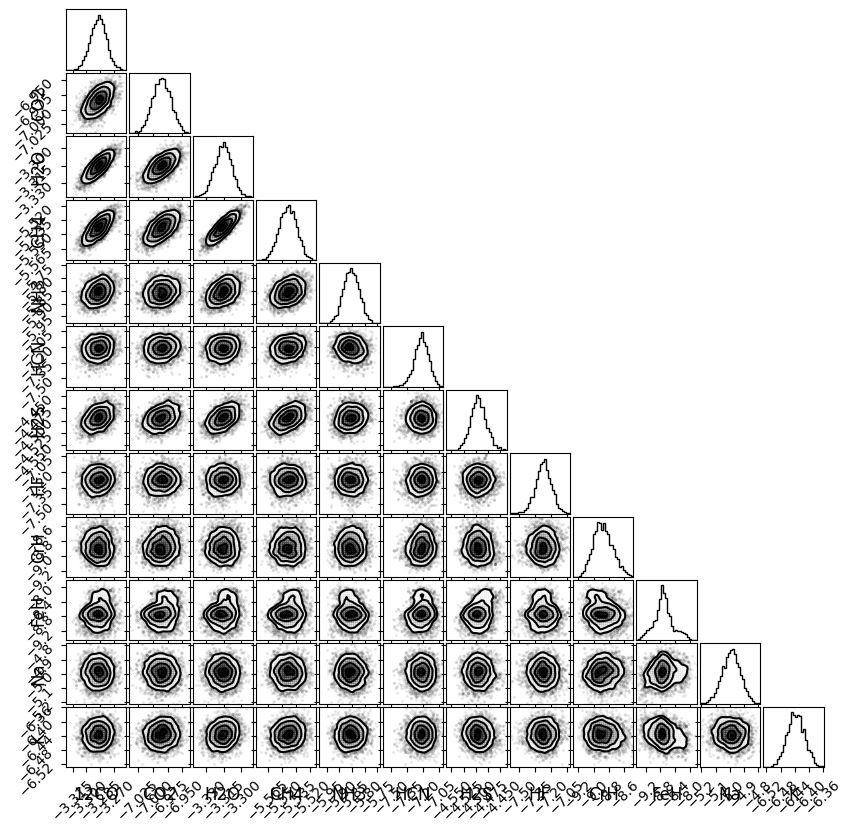

In [ ]:
import corner

m_set = 'nirspec_g140h_1'
post = np.array([
    Res_all.Chem[m_set].VMRs_posterior[species][:,-1] for species in species_info.keys()
]).T
post = np.log10(post)

ranges = [
    (np.percentile(post[:,i], 50-99.9937/2), np.percentile(post[:,i], 50+99.9937/2)) for i in range(len(species_info))
]
fig = plt.figure(figsize=(8,8))
corner.corner(
    post, labels=list(species_info.keys()), 
    label_kwargs={'fontsize':12},
    range=ranges,
    fig=fig, smooth=True, 
)
plt.show()

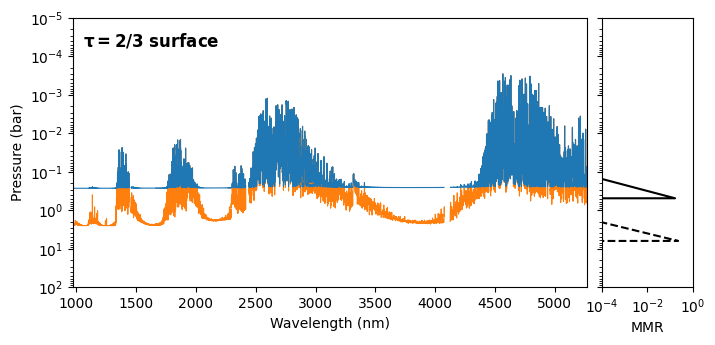

In [204]:
gratings = ['g140h', 'g235h', 'g395h']
# gratings = ['g140h']
# gratings = ['g235h']
# gratings = ['g395h']
level = 2/3

fig, ax = plt.subplots(figsize=(8,3.5), ncols=2, sharey=True, gridspec_kw={'wspace':0.05, 'width_ratios':[0.85,0.15]})
for grating in gratings:
    for detector in ['nrs1', 'nrs2']:
        m_set = f'nirspec_{grating}_{detector[-1:]}'

        ax[0].contour(
            Res_all.d_spec[m_set].wave.flatten(), Res_all.PT[m_set].pressure, Res_all.optical_depths_clear[m_set][0],
            levels=[level], colors='C1', linewidths=0.8, linestyles='-', #alpha=1-Res_all.ParamTable.get('cloud_fraction')
        )
        ax[0].contour(
            Res_all.d_spec[m_set].wave.flatten(), Res_all.PT[m_set].pressure, Res_all.optical_depths_cloudy[m_set][0],
            levels=[level], colors='C0', linewidths=0.8, linestyles='-', #alpha=Res_all.ParamTable.get('cloud_fraction')
        )

ax[0].set(xlabel='Wavelength (nm)', ylabel='Pressure (bar)', yscale='log', ylim=(1e2,1e-5))
ax[0].annotate(r'$\mathbf{\tau=2/3\ surface}$', xy=(0.02,0.95), xycoords='axes fraction', ha='left', va='top', fontsize=12)

ax[1].plot(Res_all.Cloud[m_set].mass_fractions['Fe(s)_amorphous__Mie'], Res_all.PT[m_set].pressure, c='k', lw=1.5, ls='--')
ax[1].plot(Res_all.Cloud[m_set].mass_fractions['Mg2SiO4(s)_amorphous__Mie'], Res_all.PT[m_set].pressure, c='k', lw=1.5, ls='-')

ax[1].set(xlabel='MMR', xscale='log', xlim=(1e-4,1))
plt.savefig('/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/figures/tau_surface_and_cloud_MMR.png', dpi=300, bbox_inches='tight')
plt.show()

In [205]:
Res_all.ParamTable.get('cloud_fraction')

0.7851327560319656

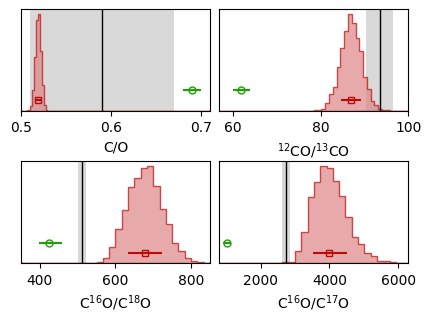

In [145]:
def get_posterior(Res, param):
    idx_free = Res.ParamTable.get(param, key='idx_free')
    if idx_free is None:
        return -np.inf
    return Res.posterior[:,idx_free]

def get_CO_posterior(Res):
    C = (
        10**get_posterior(Res,'log_12CO') + 
        10**get_posterior(Res,'log_13CO') + 
        10**get_posterior(Res,'log_CH4') + 
        10**get_posterior(Res,'log_CO2')
    )
    O = (
        10**get_posterior(Res,'log_12CO') + 
        10**get_posterior(Res,'log_13CO') + 
        2*10**get_posterior(Res,'log_CO2') + 
        10**get_posterior(Res,'log_H2O')
    )
    return C/O

def plot_errorbar(ax, post, y=0.25, **kwargs):
    x = np.median(post)
    lower = x - np.percentile(post, 16)
    upper = np.percentile(post, 84) - x
    if 'transform' not in kwargs:
        kwargs['transform'] = ax.get_xaxis_transform()

    ax.errorbar(x, y=y, xerr=np.array([[lower],[upper]]), **kwargs)

color_de_Regt_2026 = "#BB0A0A"
fc = mpl.colors.LinearSegmentedColormap.from_list('', [color_de_Regt_2026, 'w'])(0.5)
color_Gandhi_2023 = "#1DA103"

errorbar_kwargs = dict(mfc='none', elinewidth=1.5, markersize=5)

fig, ax = plt.subplots(figsize=(5,3.3), ncols=2, nrows=2, gridspec_kw={'hspace':0.5, 'wspace':0.05})

kwargs = dict(bins=100, range=[0.5,0.71], alpha=0.7, histtype='stepfilled', density=True)
ax[0,0].hist(get_CO_posterior(Res_all), ec=color_de_Regt_2026, fc=fc, **kwargs)
plot_errorbar(ax[0,0], get_CO_posterior(Res_all), y=0.1, color=color_de_Regt_2026, fmt='s', **errorbar_kwargs)
# plot_errorbar(ax[0,0], get_CO_posterior(Res_g395h), y=0.1, color='k', fmt='s', **errorbar_kwargs)
ax[0,0].set(xlabel='C/O', xlim=kwargs.get('range'), yticks=[])

kwargs['bins'] = 50
kwargs['range'] = [57,100]
ax[0,1].hist(10**get_posterior(Res_all, 'log_13CO_ratio'), ec=color_de_Regt_2026, fc=fc, **kwargs)
plot_errorbar(ax[0,1], 10**get_posterior(Res_all, 'log_13CO_ratio'), y=0.1, color=color_de_Regt_2026, fmt='s', **errorbar_kwargs)
# plot_errorbar(ax[0,1], 10**get_posterior(Res_g395h, 'log_13CO_ratio'), y=0.1, color='k', fmt='s', **errorbar_kwargs)
ax[0,1].set(xlabel=r'$^{12}$CO/$^{13}$CO', xlim=kwargs.get('range'), yticks=[])

kwargs['bins'] = 30
kwargs['range'] = [350,850]
ax[1,0].hist(10**get_posterior(Res_all, 'log_C18O_ratio'), ec=color_de_Regt_2026, fc=fc, **kwargs)
plot_errorbar(ax[1,0], 10**get_posterior(Res_all, 'log_C18O_ratio'), y=0.1, color=color_de_Regt_2026, fmt='s', **errorbar_kwargs)
# plot_errorbar(ax[1,0], 10**get_posterior(Res_g395h, 'log_C18O_ratio'), y=0.1, color='k', fmt='s', **errorbar_kwargs)
ax[1,0].set(xlabel=r'C$^{16}$O/C$^{18}$O', xlim=kwargs.get('range'), yticks=[])

kwargs['range'] = [800,6300]
ax[1,1].hist(10**get_posterior(Res_all, 'log_C17O_ratio'), ec=color_de_Regt_2026, fc=fc, **kwargs)
plot_errorbar(ax[1,1], 10**get_posterior(Res_all, 'log_C17O_ratio'), y=0.1, color=color_de_Regt_2026, fmt='s', **errorbar_kwargs)
# plot_errorbar(ax[1,1], 10**get_posterior(Res_g395h, 'log_C17O_ratio'), y=0.1, color='k', fmt='s', **errorbar_kwargs)
ax[1,1].set(xlabel=r'C$^{16}$O/C$^{17}$O', xlim=kwargs.get('range'), yticks=[])

# Solar
ax[0,0].axvline(0.59, color='k', lw=1.0); ax[0,0].axvspan(0.59-0.08, 0.59+0.08, color='k', alpha=0.15, ec='none', zorder=-1)
ax[0,1].axvline(93.5, color='k', lw=1.0); ax[0,1].axvspan(93.5-3.1, 93.5+3.1, color='k', alpha=0.15, ec='none', zorder=-1)
ax[1,0].axvline(511, color='k', lw=1.0); ax[1,0].axvspan(511-10, 511+10, color='k', alpha=0.15, ec='none', zorder=-1)
ax[1,1].axvline(2738, color='k', lw=1.0); ax[1,1].axvspan(2738-118, 2738+118, color='k', alpha=0.15, ec='none', zorder=-1)

# Gandhi et al. (2023) measurements
ax[0,0].errorbar(0.69, y=0.2, xerr=0.01, color=color_Gandhi_2023, fmt='o', transform=ax[0,0].get_xaxis_transform(), **errorbar_kwargs)
ax[0,1].errorbar(62, y=0.2, xerr=2, color=color_Gandhi_2023, fmt='o', transform=ax[0,1].get_xaxis_transform(), **errorbar_kwargs)
ax[1,0].errorbar(425, y=0.2, xerr=np.array([28,33])[:,None], color=color_Gandhi_2023, fmt='o', transform=ax[1,0].get_xaxis_transform(), **errorbar_kwargs)
ax[1,1].errorbar(1010, y=0.2, xerr=np.array([100,120])[:,None], color=color_Gandhi_2023, fmt='o', transform=ax[1,1].get_xaxis_transform(), **errorbar_kwargs)

plt.savefig('/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/figures/plots/abundance_ratios.png', dpi=300, bbox_inches='tight')
plt.show()